In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

Data loaded successfully.

Target variable 'Attrition' encoded: Yes=1, No=0

--- Random Forest Performance ---
Accuracy: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       237
           1       1.00      0.06      0.12        48

    accuracy                           0.84       285
   macro avg       0.92      0.53      0.52       285
weighted avg       0.87      0.84      0.78       285


--- Logistic Regression Performance ---
Accuracy: 0.8421052631578947


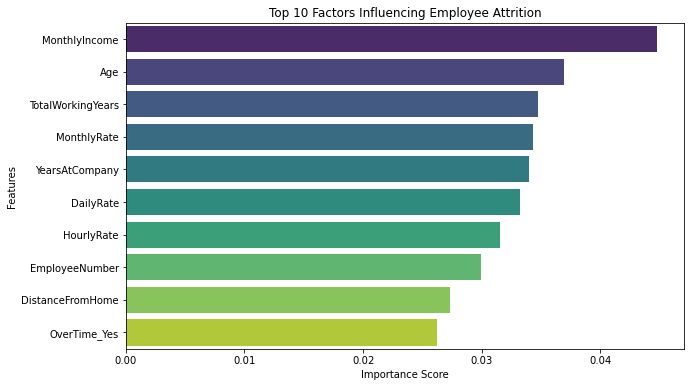


Top 5 Factors Influencing Resignation:
              Feature  Importance
11      MonthlyIncome    0.044798
0                 Age    0.036949
19  TotalWorkingYears    0.034708
12        MonthlyRate    0.034302
22     YearsAtCompany    0.033945


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==========================================
# 1. LOAD DATA
# ==========================================
# REPLACE with your actual file name found in your repo
file_path = 'HR_Analytics.csv' 

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file name.")
    
# ==========================================
# 2. DATA PREPROCESSING
# ==========================================

# A. Handle Missing Values
df = df.dropna()

# B. Encode Target Variable 'Attrition' (Yes -> 1, No -> 0)
if 'Attrition' in df.columns:
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])
    print("\nTarget variable 'Attrition' encoded: Yes=1, No=0")
else:
    print("\nWarning: 'Attrition' column not found. Please check column names.")

# C. Identify Categorical & Numerical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove Target from numerical list if present
if 'Attrition' in numerical_cols:
    numerical_cols.remove('Attrition')

# D. Encode Categorical Features (One-Hot Encoding)
# This converts 'Department' into 'Department_Sales', 'Department_HR', etc.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ==========================================
# 3. SPLIT DATA
# ==========================================
X = df_encoded.drop('Attrition', axis=1)  # Features
y = df_encoded['Attrition']              # Target

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# 4. CLASSIFICATION ALGORITHMS
# ==========================================

# --- Model 1: Random Forest (Best for Feature Importance) ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Model 2: Logistic Regression (Good for understanding odds) ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# ==========================================
# 5. EVALUATION
# ==========================================
print("\n--- Random Forest Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("\n--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# ==========================================
# 6. IDENTIFYING INFLUENCING FACTORS
# ==========================================
# We use Random Forest Feature Importance to see what drives resignation

importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Factors Influencing Employee Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\nTop 5 Factors Influencing Resignation:")
print(feature_importance_df.head(5))
